In [33]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
import os

In [39]:
src = rasterio.open('soc_europe_250m.tif')

<AxesSubplot:>

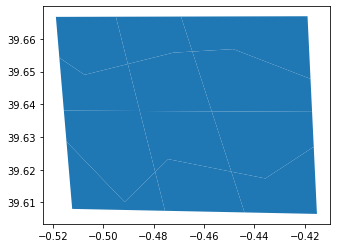

In [34]:
gdf = gpd.read_file('test_aoi_valencia_subpolygon.geojson')
gdf.plot()

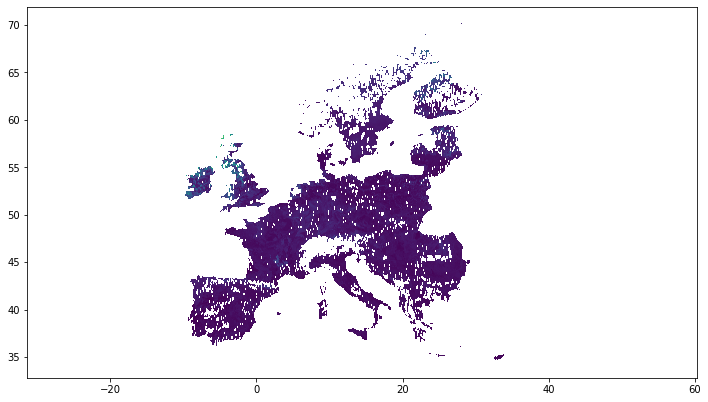

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))
show(src, transform=src.transform, ax=ax)
gdf.plot(ax=ax, color='white', alpha=.75) ## alpha is the transparency setting
plt.show()

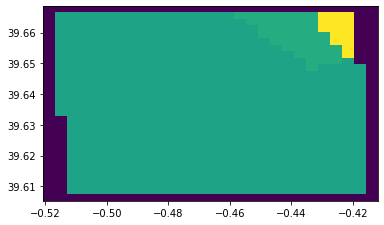

<AxesSubplot:>

In [42]:
masked, mask_transform = mask(dataset=src,shapes=gdf.geometry,crop=True)
show(masked, transform=mask_transform)

In [43]:
profile = src.meta
WIDTH = masked.shape[2] ## get the dimensions of the image we are writting out
HEIGHT = masked.shape[1]
profile.update(driver='GTiff', transform=mask_transform, height = HEIGHT, width = WIDTH)
print(profile) ## check on the updated profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 28, 'height': 30, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0038866625227629518, 0.0, -0.5207770602621622,
       0.0, -0.0021055359110548435, 39.66848452921668)}


In [44]:
with rasterio.open('clip.tif', 'w', **profile) as dst:
    dst.write(masked)


In [45]:
g_image = gdal.Open('clip.tif')
a_image = g_image.ReadAsArray()

In [51]:
a_image.mean()

32.63248